In [62]:
#Importing Modules
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [63]:
#Importing Modules
import numpy as np
import pandas as pd

In [64]:
#Importing Modules
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [65]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [66]:
#Create path for database set up
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#Connecting the engine 
conn = engine.connect()

In [67]:
#Inspecting the measurement database to find the name of fields
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')

#Printing the columns 
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [68]:
#Inspecting the station database to find the name of fields
columns = inspector.get_columns('station')

#Printing the columns 
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [69]:
#Displaying the first 5 rows of the measurement database 
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [70]:
# Reflecting existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)

# Viewing the class
Base.classes.keys()

['measurement', 'station']

In [71]:
# Saving measurement to each table
measurement = Base.classes.measurement

# Saving station to each table 
station = Base.classes.station

In [72]:
# Beginning session
session = Session(engine)

# Finding the last date in the dataset 
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Closing session 
session.close()

# Exploratory Climate Analysis

In [73]:
# Beginning session
session = Session(engine)

# Designing a query to retrieve the last 12 months of precipitation data and plot the result
results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_from_last_date).\
    order_by(measurement.date).all()

# Closing session 
session.close()

In [74]:
# Performing a query to retrieve the data and precipitation scores
date = [result[0] for result in results]
prcp = [result[1] for result in results]

In [75]:
# Inputting the date and precipitation into a dictionary 
results = {'Date': data,
'Precipitation': prcp}

# Converting into a Data Frame
results_df = pd.DataFrame(results)

# Sort the dataframe by date
results_df = results_df.set_index('Date')

# Sorting the values by date 
results_df = results_df.sort_values('Date')

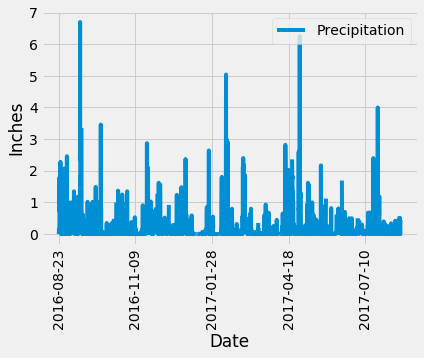

In [76]:
# Plotting the date and precipitation 
results_df.plot(rot=90)
plt.ylabel("Inches")
plt.legend(loc='upper right')

In [77]:
# Displaying summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [78]:
# Beginning session
session = Session(engine)

# Displaying how many stations are in the data set
stations = session.query(station.station, station.name).all()

# Closing session 
session.close()

# Displaying station_count
stations

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [79]:
# Beginning session
session = Session(engine)

# Displaying how active each station is
active_stations = session.query(measurement.station, func.count(measurement.prcp)).\
    group_by(measurement.station).all()

# Closing session 
session.close()

# Displaying how active each station is 
active_stations

[('USC00511918', 1932),
 ('USC00513117', 2696),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00517948', 683),
 ('USC00518838', 342),
 ('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00519523', 2572)]

In [80]:
# Beginning session
session = Session(engine)

# Displaying in descending order which station is the most active 
station_desc = session.query(measurement.station, func.count(measurement.prcp)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.prcp).desc()).all()

# Displaying which station is the most active 
most_active = station_desc[0][0]

# Closing session 
session.close()

# Displaying the most active station
most_active

'USC00519281'

In [81]:
# Beginning session
session = Session(engine)

# Finding the lowest temp for the most active station
low_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == most_active).all()

# Finding the highest temp for the most active station
high_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == most_active).all()

# Finding the average temp for the most active station
avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == most_active).all()

# Closing session 
session.close()

# Printing the lowest, highest, and average temperature for the most active station
print(f'The lowest temperature : {low_temp[0][0]}. The highest temperature : {high_temp[0][0]}.\
 The average temperature : {avg_temp[0][0]}')

The lowest temperature : 54.0. The highest temperature : 85.0. The average temperature : 71.66378066378067


In [82]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurement.station, func.count(measurement.tobs)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Beginning session
session = Session(engine)

#Finding the station with the highest number of observtions for the last year
results = session.query(measurement.tobs).\
    filter(measurement.station == most_active).\
    filter(measurement.date >= one_year_from_last_date).all()

# Closing session 
session.close()

# Putting results in a variable
temp = [result[0] for result in results]

# Converting temp to a Data Frame 
temp_df = pd.DataFrame(temp)

Text(0.5, 1.0, '')

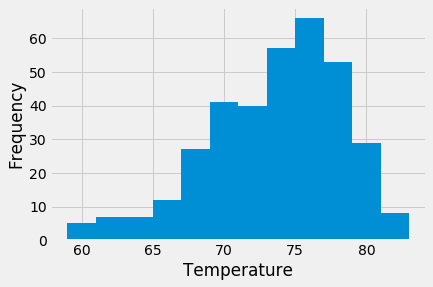

In [27]:
temp_df = temp_df.hist(bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title('')

## Bonus Challenge Assignment

In [248]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
